In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('hua.xlsx')

Text(0.5, 1.0, '同产品，不同bgm对流量的影响')

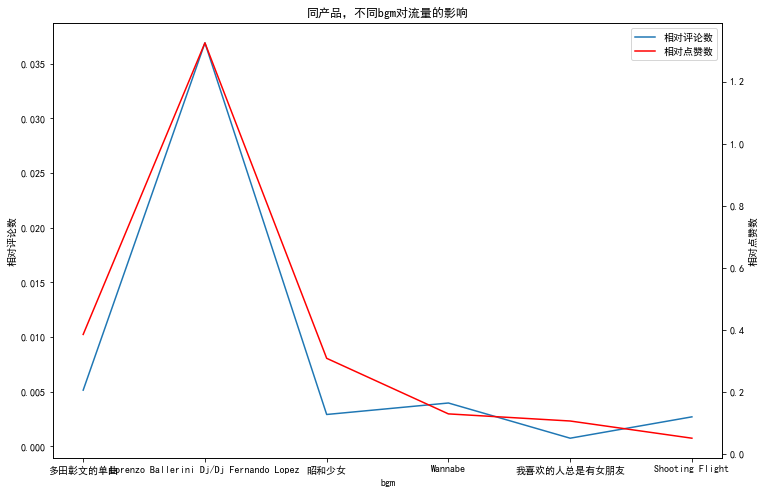

In [4]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
plt.rcParams['font.sans-serif']=['SimHei'] 
# 共享x轴，生成次坐标轴
ax_sub = ax.twinx()
# 绘图
l1, = ax.plot(data['bgm'],data['相对评论数'], label='相对评论数')   
l2, = ax_sub.plot(data['bgm'],data['相对点赞数'],color='red', label='相对点赞数')
# 放置图例
plt.legend(handles=[l1, l2], labels=['相对评论数', '相对点赞数'], loc=0)
# 设置主次y轴的title
ax.set_ylabel('相对评论数')
ax_sub.set_ylabel('相对点赞数')
# 设置x轴title
ax.set_xlabel('bgm')
# 设置图片title
ax.set_title('同产品，不同bgm对流量的影响')

In [5]:
data2=pd.read_excel('music_data.xlsx')

In [6]:
data2["'点赞↓"]=data2["'点赞↓"].str.replace("'",'')#数据清洗
data2["'点赞↓"]=data2["'点赞↓"].astype(float)#转换成浮点型
data2["'评论↓"]=data2["'评论↓"].str.replace("'",'')
data2["'评论↓"]=data2["'评论↓"].astype(float)

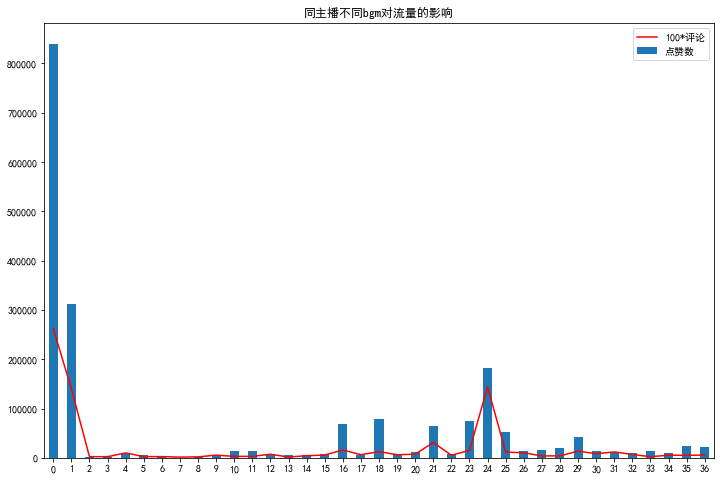

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
data2["'点赞↓"].plot(kind='bar',label='点赞数')
(100*data2["'评论↓"]).plot(label='100*评论',color='red')
ax.set_title('同主播不同bgm对流量的影响')
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.legend()

In [8]:
data3=pd.read_excel('data_music.xlsx')

In [9]:
data3['音乐id'].value_counts()

'6723142795059792643    18
'6723825492803455747     2
'6721961402338233100     2
'6743856754901289735     2
'6705975632750234376     2
                        ..
'6809929137646881549     1
'6801414910183377672     1
'6836176330942352136     1
'6725710994095704846     1
'6807299663167998734     1
Name: 音乐id, Length: 245, dtype: int64

In [10]:
data3.drop_duplicates(subset='音乐id',keep='first',inplace=True)#去除音乐id中重复的行

In [11]:
data3=data3.reset_index(drop=True)#重新设置索引

In [21]:
x=data3.loc[:,(['音乐id','BPM','KEY'])]#选取列数据

In [13]:
import re#正则表达式re

将key中的数字和字母分开

In [14]:
y=[]
for i in x['KEY']:
    a=re.findall(r'\d+',i)
    y.append(a)    

In [22]:
x=pd.concat([pd.DataFrame(y),x],axis=1)

In [16]:
z=[]
for i in x['KEY']:
    a=re.findall(r'[A-Z]',i)
    z.append(a)

In [25]:
x=pd.concat([pd.DataFrame(z),x],axis=1)

In [26]:
x.columns=['音阶','音调','音乐id','BPM','KEY']

In [27]:
p=pd.get_dummies(pd.DataFrame(z)) 

In [28]:
x=pd.concat([p,x],axis=1)

In [29]:
x

,0_A,0_B,音阶,音调,音乐id,BPM,KEY
0,1,0,A,9,'6717854733593332483,128,9A
1,1,0,A,4,'6717904795849575172,109,4A
2,0,1,B,11,'6820228422540561160,97,11B
3,1,0,A,8,'6779124051601591043,82,8A
4,1,0,A,5,'6754216681482423047,124,5A
...,...,...,...,...,...,...,...
240,0,1,B,10,'6804003628068637453,148,10B
241,1,0,A,8,'6802130412870404877,100,8A
242,1,0,A,5,'6783577391505459971,86,5A
243,1,0,A,5,'6780279397971921677,114,5A


In [30]:
c=x.loc[:,(['音乐id','BPM','0_A','0_B'])]

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [32]:
model=KMeans(n_clusters=3).fit(x.loc[:,(['BPM','0_A','0_B'])])

In [33]:
model.labels_

array([0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1,
       2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2,
       1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 1])

In [34]:
silhouette_score(x.loc[:,(['BPM','0_A','0_B'])],model.labels_)

0.5764744460039718

In [35]:

for i in range(2,10):
    model=KMeans(n_clusters=i).fit(x.loc[:,(['BPM','0_A','0_B'])])
    a=silhouette_score(x.loc[:,(['BPM','0_A','0_B'])],model.labels_)
    print(a)
    

0.6040537516032575
0.5764744460039718
0.5782930428004501
0.5736110831180257
0.5591639112564885
0.5369453635847563
0.5413572368508109
0.5481655541519833


In [36]:
model=KMeans(n_clusters=2).fit(x.loc[:,(['BPM','0_A','0_B'])])
silhouette_score(x.loc[:,(['BPM','0_A','0_B'])],model.labels_)

0.6040537516032575

In [37]:
s=model.labels_

In [38]:
data3['分类']=s

In [39]:
data3.sort_values('点赞↓',ascending=False)

,昵称,视频标题,发布时间↓,点赞↓,评论↓,分享↓,商品标题,商品价格,商品销量,音乐id,BPM,KEY,音乐链接,分类
207,'小嘟娜donna,'叠涂腮红真的嫩上天，三秒减龄。#美妆,'2020-02-10 19:53:01,'987,'115,'94,'花西子胭脂腮红膏/自然裸妆珠光微闪晒红元气少女提亮肤色腮黄盘,'19494,'89,'6791776726496234253,105,7B,脸红的思春期 (??????)《??? (Chocolate)》https://c.y.qq...,1
227,'小嘟娜donna,'少女心有一吨重！这个颜色也太好看了啊,'2019-10-15 19:54:20,'975,'87,'83,'Judydoll橘朵哑光唇釉女丝绒雾面番茄色姨妈色易上色学生官方,'40228,'49.8,'6747989535894096643,117,7B,东京塔子《想变得可爱》https://c.y.qq.com/base/fcgi-bin/u?...,0
185,'小嘟娜donna,'不吹！！手残党都会的无脑遮瑕教程，一键美颜，还不快收藏？#底妆,'2020-06-05 17:31:27,'971,'88,'41,'【618礼盒】韩国Medicube乐得遮瑕液针管修复笔膏棒美蒂秋芙官网,'24692,'109,'6834769724556053262,90,9B,接个吻，开一枪《YOUTH (Kissgun Remix)》https://c.y.qq.c...,1
102,'美妆师咕咚,'烫染干枯受损发质我说第一谁敢排第二！不过这次，终于有救了#能洗头的玻尿酸 #换装,'2020-03-27 18:01:49,'97012,'1062,'595,'力士(LUX)洗护套装 大白瓶 水润丝滑洗发乳750mlx2送洗发水护发素100ml小样x...,'20646,'84.9,'6808817320861993740,93,9A,黄文文《骑上我心爱的小摩托》https://c.y.qq.com/base/fcgi-bin...,1
168,'仙姆SamChak,'别人的修容是修容，你的是络腮胡！,'2020-05-10 18:28:26,'95969,'2251,'1862,'susisu苏西苏幸运币四色修颜粉盘自然立体持久阴影鼻影侧影发际线,'1205,'89,'6825160514302561038,121,7B,分享折耳/lookc/LTone的单曲《限量版》:?http://music.163.com...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,'美妆达人桃子酱,'请问有女生能抵抗得了玫瑰的诱惑吗？反正我是不能#护肤,'2020-02-29 17:24:22,'102072,'848,'269,'百雀羚三生花玫瑰花瓣精华水,'269,'159,'6798742977771899652,85,8A,温柔的《我感觉你说这句话你在无中生有暗度陈仓》https://c.y.qq.com/base...,1
32,'美兰Lan,'遇到帅哥，当然主动去撩！#美妆 #我与土地的故事 @电商小助手,'2019-06-24 17:17:45,'10186,'68,'64,'【官方直营】 完美日记 九色眼影盘,'8070,'99.9,'6705975632750234376,104,5A,Jessie J/Ariana Grande/Nicki Minaj《Bang Bang》(...,1
179,小嘟娜donna','喜欢无辜还是上挑眼线呢？两种眼线教程，还不快收藏～#化妆 #眼线,'2019-12-10 19:27:30,'1014086,'27153,'53374,'小奥汀眼线液笔 彩色防水不晕染持久棕色胶笔极细新手初学者奥丁,'295681,'69,'6768763077073914628,93,11B,Landon Austin《Boom Clap》https://c.y.qq.com/bas...,1
139,'山风岚岚,'啥呀...4 ％烟酰胺的面膜还赠1安瓶？这牌子是不想赚吗 #好物推荐 #测评,'2020-06-07 17:00:00,'1002,'51,'42,'自然堂安瓶面膜10片烟酰胺细致提亮补水保湿海藻修护女官网旗舰店,'25632,'128,'6834897033204157191,99,5A,k i d n e y《3i√3-2i+6=0》https://c.y.qq.com/bas...,1
